# Library

In [3]:
import os
import re
import sys
from pathlib import Path

import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# custom package imports
sys.path.append("src/")

from data_preprocessing import *
from model_training import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leonhard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Leonhard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leonhard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
project_root = Path(os.getcwd())

RAW_DATA_PATH = project_root / "data" / "raw"
PROCESSED_DATA_PATH = project_root / "data" / "processed"
DICTIONARIES_PATH = project_root / "data" / "dictionaries"

# Load the data

In [5]:
df1 = pd.read_csv(RAW_DATA_PATH / "reviews_com.ss.android.ugc.trill_1.csv")
df2 = pd.read_csv(RAW_DATA_PATH / "reviews_com.ss.android.ugc.trill_2.csv")
df3 = pd.read_csv(RAW_DATA_PATH / "reviews_com.ss.android.ugc.trill_3.csv")
df4 = pd.read_csv(RAW_DATA_PATH / "reviews_com.ss.android.ugc.trill_4.csv")
df5 = pd.read_csv(RAW_DATA_PATH / "reviews_com.ss.android.ugc.trill_5.csv")

df5.head()

,Review,Rating,Tanggal,Username,Likes
0,"tiktok sangat bagus sekali,tapi baru kemarin s...",5,2025-04-13 21:43:06,Pengguna Google,1502
1,Saya ingin memberikan masukan mengenai tombol ...,5,2025-04-08 12:07:21,Pengguna Google,5131
2,"selain sering lemot bukan krn jaringan wifi,ju...",5,2025-04-12 23:20:35,Pengguna Google,2007
3,"aplikasi nya bagus, dan sangat menyenangkan, t...",5,2025-04-02 22:52:56,Pengguna Google,7630
4,Tolong kepada pihak tiktok mengapa masih ada s...,5,2025-04-09 22:25:25,Pengguna Google,2007


In [23]:
# df = pd.concat([df1, df3, df5], ignore_index=True)

df = pd.read_csv(RAW_DATA_PATH / "reviews_com.ss.android.ugc.trill.csv")
df.head()

,Review,Rating,Tanggal,Username,Likes
0,"aplikasi nya lemot, saya mau buka video draf s...",1,2025-04-14 20:47:22,Pengguna Google,1004
1,"tiktok sangat bagus sekali,tapi baru kemarin s...",5,2025-04-13 21:43:06,Pengguna Google,1435
2,kenapa sekarang setiap kali upload video malah...,3,2025-04-05 08:21:26,Pengguna Google,715
3,"maaf bukan bermaksud menjelekan tetapi,aplikas...",2,2025-04-10 20:06:40,Pengguna Google,266
4,Saya ingin memberikan masukan mengenai tombol ...,5,2025-04-08 12:07:21,Pengguna Google,5070


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Review    108000 non-null  object
 1   Rating    108000 non-null  int64 
 2   Tanggal   108000 non-null  object
 3   Username  108000 non-null  object
 4   Likes     108000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 4.1+ MB


## Text Preprocessing

In [25]:
df.isna().sum()

Review      0
Rating      0
Tanggal     0
Username    0
Likes       0
dtype: int64

In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
df_cleaned = df.copy()

In [28]:
df_cleaned.head()

,Review,Rating,Tanggal,Username,Likes
0,"aplikasi nya lemot, saya mau buka video draf s...",1,2025-04-14 20:47:22,Pengguna Google,1004
1,"tiktok sangat bagus sekali,tapi baru kemarin s...",5,2025-04-13 21:43:06,Pengguna Google,1435
2,kenapa sekarang setiap kali upload video malah...,3,2025-04-05 08:21:26,Pengguna Google,715
3,"maaf bukan bermaksud menjelekan tetapi,aplikas...",2,2025-04-10 20:06:40,Pengguna Google,266
4,Saya ingin memberikan masukan mengenai tombol ...,5,2025-04-08 12:07:21,Pengguna Google,5070


In [29]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df_cleaned["text_clean"] = df_cleaned["Review"].apply(cleaningText)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
df_cleaned["text_tokenize"] = df_cleaned["text_clean"].apply(tokenizingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df_cleaned["text_slangwords"] = df_cleaned["text_tokenize"].apply(replace_slang_word)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df_cleaned["text_stopword"] = df_cleaned["text_slangwords"].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df_cleaned["text_akhir"] = df_cleaned["text_stopword"].apply(toSentence)

In [30]:
df_cleaned.head()

,Review,Rating,Tanggal,Username,Likes,text_clean,text_tokenize,text_slangwords,text_stopword,text_akhir
0,"aplikasi nya lemot, saya mau buka video draf s...",1,2025-04-14 20:47:22,Pengguna Google,1004,aplikasi nya lemot saya mau buka video draf sa...,"[aplikasi, nya, lemot, saya, mau, buka, video,...","[aplikasi, nya, lemot, saya, mau, buka, video,...","[aplikasi, lemot, buka, video, draf, enggak, k...",aplikasi lemot buka video draf enggak kali pen...
1,"tiktok sangat bagus sekali,tapi baru kemarin s...",5,2025-04-13 21:43:06,Pengguna Google,1435,tiktok sangat bagus sekali tapi baru kemarin s...,"[tiktok, sangat, bagus, sekali, tapi, baru, ke...","[tiktok, sangat, bagus, sekali, tapi, baru, ke...","[tiktok, sangat, bagus, sekali, kemarin, tikto...",tiktok sangat bagus sekali kemarin tiktok pas ...
2,kenapa sekarang setiap kali upload video malah...,3,2025-04-05 08:21:26,Pengguna Google,715,kenapa sekarang setiap kali upload video malah...,"[kenapa, sekarang, setiap, kali, upload, video...","[kenapa, sekarang, setiap, kali, upload, video...","[kali, upload, video, burik, video, aslinya, j...",kali upload video burik video aslinya jernih h...
3,"maaf bukan bermaksud menjelekan tetapi,aplikas...",2,2025-04-10 20:06:40,Pengguna Google,266,maaf bukan bermaksud menjelekan tetapi aplikas...,"[maaf, bukan, bermaksud, menjelekan, tetapi, a...","[maaf, bukan, bermaksud, menjelekkan, tetapi, ...","[maaf, menjelekkan, aplikasi, sangat, bagus, l...",maaf menjelekkan aplikasi sangat bagus lancar ...
4,Saya ingin memberikan masukan mengenai tombol ...,5,2025-04-08 12:07:21,Pengguna Google,5070,saya ingin memberikan masukan mengenai tombol ...,"[saya, ingin, memberikan, masukan, mengenai, t...","[saya, ingin, memberikan, masukan, mengenai, t...","[masukan, tombol, tidak, suka, dislike, muncul...",masukan tombol tidak suka dislike muncul kanan...


## Labeling

In [32]:
df_cleaned["Sentimen"] = df_cleaned["Rating"].map(
    {1: "negatif", 2: "negatif", 3: "netral", 4: "positif", 5: "positif"}
)

In [33]:
df_cleaned.tail()

,Review,Rating,Tanggal,Username,Likes,text_clean,text_tokenize,text_slangwords,text_stopword,text_akhir,Sentimen
107995,"Aplikasinya bagus banget,banyak info menarik d...",5,2020-12-19 18:54:05,Pengguna Google,0,aplikasinya bagus banget banyak info menarik d...,"[aplikasinya, bagus, banget, banyak, info, men...","[aplikasinya, bagus, banget, banyak, info, men...","[aplikasinya, bagus, banget, info, menarik, ti...",aplikasinya bagus banget info menarik tiktok p...,positif
107996,"Ini sudah kali kelima hapus dan download lagi,...",1,2023-09-30 23:16:43,Pengguna Google,0,ini sudah kali kelima hapus dan download lagi ...,"[ini, sudah, kali, kelima, hapus, dan, downloa...","[ini, sudah, kali, kelima, hapus, dan, downloa...","[kali, hapus, download, lagi, perbaiki, bug, t...",kali hapus download lagi perbaiki bug tiktok t...,negatif
107997,sinyal bagus malah ngelag gak bisa buka tiktok...,1,2024-10-16 18:25:04,Pengguna Google,0,sinyal bagus malah ngelag gak bisa buka tiktok...,"[sinyal, bagus, malah, ngelag, gak, bisa, buka...","[sinyal, bagus, malah, ngelag, enggak, bisa, b...","[sinyal, bagus, ngelag, enggak, buka, tiktok, ...",sinyal bagus ngelag enggak buka tiktok slide b...,negatif
107998,Apliaksi nya bagus dan benar benar membayar ta...,5,2021-06-12 02:50:23,Pengguna Google,0,apliaksi nya bagus dan benar benar membayar ta...,"[apliaksi, nya, bagus, dan, benar, benar, memb...","[apliaksi, nya, bagus, dan, benar, benar, memb...","[apliaksi, bagus, membayar, tatapi, tolong, ev...",apliaksi bagus membayar tatapi tolong even koi...,positif
107999,Ril apk ini banyak banget k-pop idol yang mung...,5,2023-06-11 16:12:47,Pengguna Google,1,ril apk ini banyak banget k pop idol yang mung...,"[ril, apk, ini, banyak, banget, k, pop, idol, ...","[ril, apk, ini, banyak, banget, ke, pop, idol,...","[ril, apk, banget, pop, idol, suka, lagi, poko...",ril apk banget pop idol suka lagi pokok suka b...,positif


In [ ]:
# df_shuffled = df_cleaned.sample(frac=1).reset_index(drop=True)
# df_shuffled

# Save cleaned and labeled data

In [34]:
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)

filename = "df_processed_full_100rb.csv"

# Save the cleaned text to a CSV file with error handling
try:
    df_cleaned.to_csv(PROCESSED_DATA_PATH / filename, index=False)
    print(f"File saved successfully at {PROCESSED_DATA_PATH / filename}")
except Exception as e:
    print(f"An error occurred while saving the file: {e}")

File saved successfully at b:\Project\nlp\sentiment-analysis-app-reviews\data\processed\df_processed_full_100rb.csv


# Analysis

# Feature Encoding

In [38]:
df_cleaned.replace(
    {"Sentimen": {"negatif": 0, "netral": 1, "positif": 2}}, inplace=True
)
df_cleaned.head()

C:\Users\Leonhard\AppData\Local\Temp\ipykernel_3012\1268189667.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned.replace(


,Review,Rating,Tanggal,Username,Likes,text_clean,text_tokenize,text_slangwords,text_stopword,text_akhir,Sentimen
0,"aplikasi nya lemot, saya mau buka video draf s...",1,2025-04-14 20:47:22,Pengguna Google,1004,aplikasi nya lemot saya mau buka video draf sa...,"[aplikasi, nya, lemot, saya, mau, buka, video,...","[aplikasi, nya, lemot, saya, mau, buka, video,...","[aplikasi, lemot, buka, video, draf, enggak, k...",aplikasi lemot buka video draf enggak kali pen...,0
1,"tiktok sangat bagus sekali,tapi baru kemarin s...",5,2025-04-13 21:43:06,Pengguna Google,1435,tiktok sangat bagus sekali tapi baru kemarin s...,"[tiktok, sangat, bagus, sekali, tapi, baru, ke...","[tiktok, sangat, bagus, sekali, tapi, baru, ke...","[tiktok, sangat, bagus, sekali, kemarin, tikto...",tiktok sangat bagus sekali kemarin tiktok pas ...,2
2,kenapa sekarang setiap kali upload video malah...,3,2025-04-05 08:21:26,Pengguna Google,715,kenapa sekarang setiap kali upload video malah...,"[kenapa, sekarang, setiap, kali, upload, video...","[kenapa, sekarang, setiap, kali, upload, video...","[kali, upload, video, burik, video, aslinya, j...",kali upload video burik video aslinya jernih h...,1
3,"maaf bukan bermaksud menjelekan tetapi,aplikas...",2,2025-04-10 20:06:40,Pengguna Google,266,maaf bukan bermaksud menjelekan tetapi aplikas...,"[maaf, bukan, bermaksud, menjelekan, tetapi, a...","[maaf, bukan, bermaksud, menjelekkan, tetapi, ...","[maaf, menjelekkan, aplikasi, sangat, bagus, l...",maaf menjelekkan aplikasi sangat bagus lancar ...,0
4,Saya ingin memberikan masukan mengenai tombol ...,5,2025-04-08 12:07:21,Pengguna Google,5070,saya ingin memberikan masukan mengenai tombol ...,"[saya, ingin, memberikan, masukan, mengenai, t...","[saya, ingin, memberikan, masukan, mengenai, t...","[masukan, tombol, tidak, suka, dislike, muncul...",masukan tombol tidak suka dislike muncul kanan...,2


# Feature Extraction

In [40]:
X = df_cleaned["text_akhir"]
y = df_cleaned["Sentimen"]

In [41]:
y

0         0
1         2
2         1
3         0
4         2
         ..
107995    2
107996    0
107997    0
107998    2
107999    2
Name: Sentimen, Length: 108000, dtype: int64

In [42]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

X_vect = tfidf_vectorizer.fit_transform(X)
features_df = pd.DataFrame(
    X_vect.toarray(), columns=tfidf_vectorizer.get_feature_names_out()
)

# Menampilkan hasil ekstraksi fitur
features_df

,ada,adakan,adil,admin,aduh,affiliate,agama,ah,air,ajukan,...,warna,watermark,wawasan,wb,wifi,wow,wr,yaudah,youtube,yuk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.213242,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
107996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
107997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
107998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# Split data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    features_df, y, test_size=0.2, random_state=42
)

# Modeling

In [44]:
from sklearn.naive_bayes import ComplementNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [45]:
# Models dictionary
models = {
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "RBF-SVM": SVC(random_state=42, kernel="rbf"),
    "Lienar-SVM": SVC(random_state=42, kernel="linear"),
    "poly2-SVM": SVC(random_state=42, kernel="poly", degree=2),
    "poly3-SVM": SVC(random_state=42, kernel="poly", degree=3),
    "poly4-SVM": SVC(random_state=42, kernel="poly", degree=4),
    "LogisticReg": LogisticRegression(random_state=42),
}

===================================== MultinomialNB Classifier =====================================
Training
Train Accuracy: 0.7083680555555556
Train Precision: 0.6794781997944037
Train Recall: 0.7083680555555556
Train F1-Score: 0.6588330778657869
Confusion Matrix:


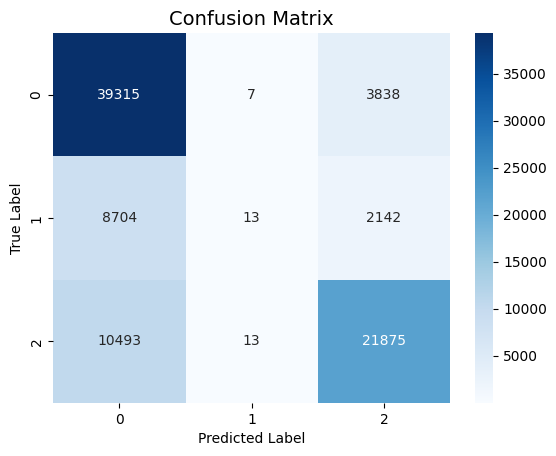


Testing
Test Accuracy: 0.703287037037037
Test Precision: 0.6658383886952234
Test Recall: 0.703287037037037
Test F1-Score: 0.6529069859292856
Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.91      0.77     10792
           1       0.33      0.00      0.00      2772
           2       0.78      0.67      0.72      8036

    accuracy                           0.70     21600
   macro avg       0.59      0.53      0.50     21600
weighted avg       0.67      0.70      0.65     21600

Confusion Matrix:


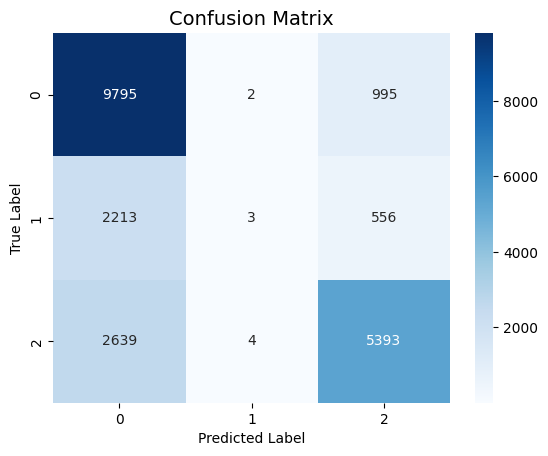

====================================== BernoulliNB Classifier ======================================
Training
Train Accuracy: 0.6973958333333333
Train Precision: 0.6671217425629964
Train Recall: 0.6973958333333333
Train F1-Score: 0.6774018556260896
Confusion Matrix:


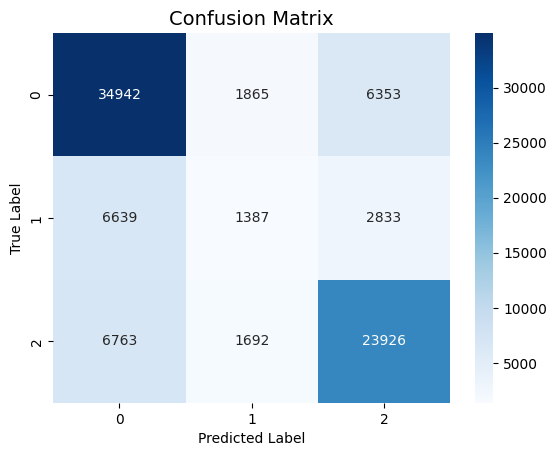


Testing
Test Accuracy: 0.6888425925925926
Test Precision: 0.6564622520334151
Test Recall: 0.6888425925925926
Test F1-Score: 0.6679913600318429
Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.81      0.76     10792
           1       0.25      0.12      0.16      2772
           2       0.71      0.73      0.72      8036

    accuracy                           0.69     21600
   macro avg       0.56      0.55      0.55     21600
weighted avg       0.66      0.69      0.67     21600

Confusion Matrix:


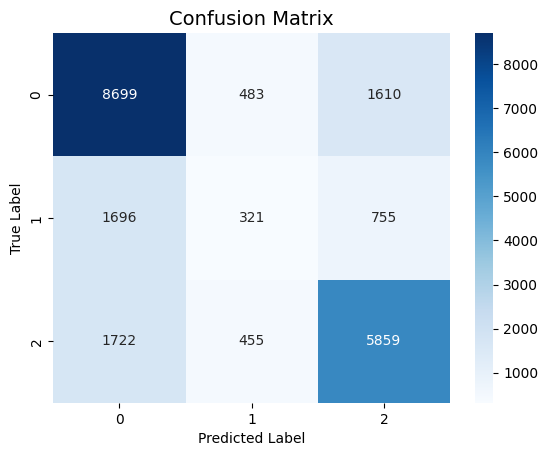

===================================== ComplementNB Classifier ======================================
Training
Train Accuracy: 0.6962384259259259
Train Precision: 0.6557052603749994
Train Recall: 0.6962384259259259
Train F1-Score: 0.6675170449242754
Confusion Matrix:


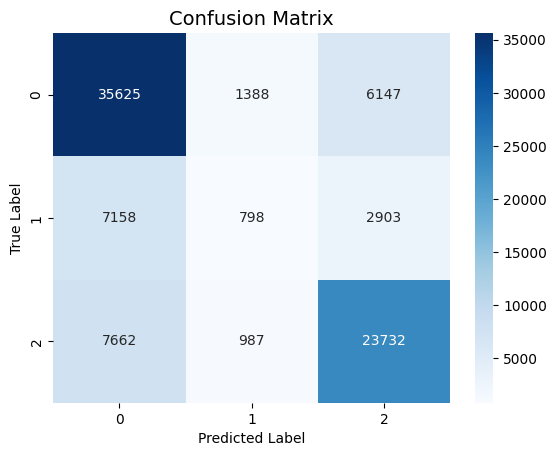


Testing
Test Accuracy: 0.6910648148148149
Test Precision: 0.6507528394833564
Test Recall: 0.6910648148148149
Test F1-Score: 0.6627747491142195
Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.82      0.76     10792
           1       0.25      0.08      0.12      2772
           2       0.72      0.73      0.72      8036

    accuracy                           0.69     21600
   macro avg       0.56      0.54      0.53     21600
weighted avg       0.65      0.69      0.66     21600

Confusion Matrix:


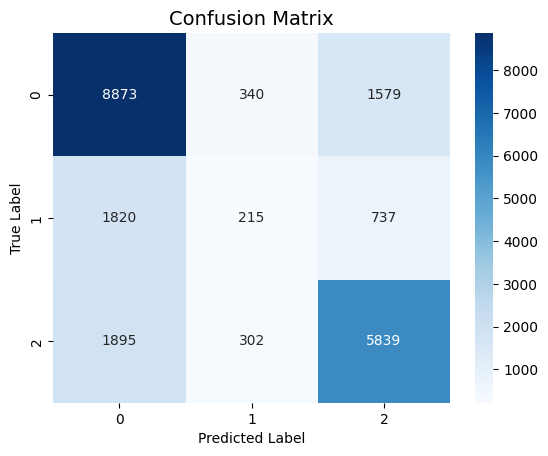

In [ ]:
result = train_and_evaluate_models(X_train, X_test, y_train, y_test, models)

result

======================================== LogReg Classifier =========================================
Training
Train Accuracy: 0.6105555555555555
Train Precision: 0.6132515093014635
Train Recall: 0.6105555555555555
Train F1-Score: 0.6108469489117347
Confusion Matrix:


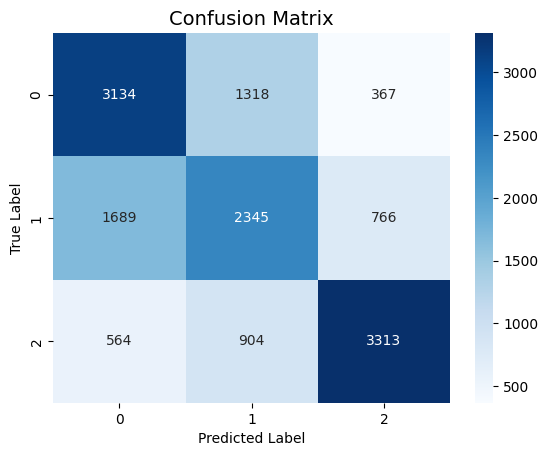


Testing
Test Accuracy: 0.5980555555555556
Test Precision: 0.5991797074513618
Test Recall: 0.5980555555555556
Test F1-Score: 0.5979378891487704
Classification Report: 
              precision    recall  f1-score   support

           0       0.57      0.63      0.60      1181
           1       0.50      0.47      0.49      1200
           2       0.72      0.69      0.71      1219

    accuracy                           0.60      3600
   macro avg       0.60      0.60      0.60      3600
weighted avg       0.60      0.60      0.60      3600

Confusion Matrix:


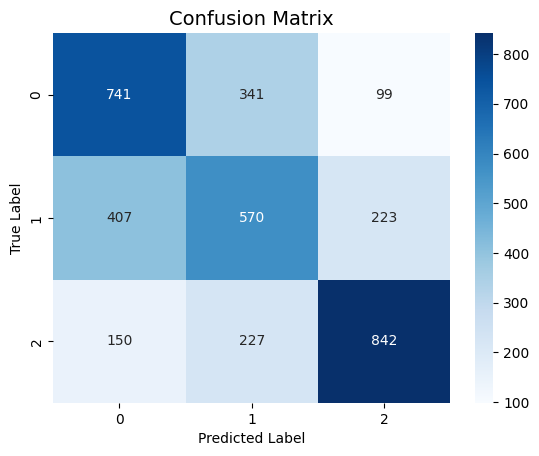

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Training Time (seconds)
0,LogReg,0.610556,0.598056,0.613252,0.59918,0.610556,0.598056,0.610847,0.597938,0.696015


In [ ]:
result_logreg = train_and_evaluate_models(
    X_train,
    X_test,
    y_train,
    y_test,
    {
        "LogReg": LogisticRegression(random_state=42),
    },
)

result_logreg